In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

LIBRARIES

In [ ]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
np.random.seed(42)
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
import nltk, string, re, spacy,unicodedata, random
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [ ]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/NLP END SEM/'

# Tamil Dataset Abusive

In [ ]:
train_data = pd.read_csv(folder_path + "tamil_offensive_full_train.csv",delimiter='\t',header = None)
valid_data = pd.read_csv(folder_path + "tamil_offensive_full_dev.csv",delimiter='\t',header = None)
test_data = pd.read_csv(folder_path + "tamil_offensive_full_test.csv",delimiter='\t',header = None)

In [ ]:

train_data = train_data.drop(columns=2)
train_data = train_data.rename(columns={0:'text',1:'label'})
valid_data = valid_data.drop(columns=2)
valid_data = valid_data.rename(columns={0:'text',1:'label'})
test_data = test_data.rename(columns={0:'text'})

In [ ]:
train_data['label'].value_counts()

Not_offensive                           25425
Offensive_Untargetede                    2906
Offensive_Targeted_Insult_Group          2557
Offensive_Targeted_Insult_Individual     2343
not-Tamil                                1454
Offensive_Targeted_Insult_Other           454
Name: label, dtype: int64

In [ ]:
valid_data['label'].value_counts()

Not_offensive                           3193
Offensive_Untargetede                    356
Offensive_Targeted_Insult_Individual     307
Offensive_Targeted_Insult_Group          295
not-Tamil                                172
Offensive_Targeted_Insult_Other           65
Name: label, dtype: int64

In [ ]:
train_data['enc_label'] = train_data['label'].replace({'Not_offensive':0, 'Offensive_Untargetede':1,'Offensive_Targeted_Insult_Group':2
                                                       ,'Offensive_Targeted_Insult_Individual':3,'not-Tamil':4,'Offensive_Targeted_Insult_Other':5
                                                       })
valid_data['enc_label'] = valid_data['label'].replace({'Not_offensive':0, 'Offensive_Untargetede':1,'Offensive_Targeted_Insult_Group':2
                                                       ,'Offensive_Targeted_Insult_Individual':3,'not-Tamil':4,'Offensive_Targeted_Insult_Other':5
                                                       })

In [ ]:
train_data

,text,label,enc_label
0,movie vara level la Erika poguthu,Not_offensive,0
1,I love Ajith Kumar Vivegam movie inki mjy bht ...,not-Tamil,4
2,Padam nalla comedy padama irukum polaye..,Not_offensive,0
3,karthick subburaj anne .... intha padam vetri ...,Not_offensive,0
4,கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁,Not_offensive,0
...,...,...,...
35134,Trending number #2 idhukku nammalam karanamnu ...,Not_offensive,0
35135,"Movie script super, athuvum HIP HOP Tamizha mu...",Not_offensive,0
35136,Just 3k likes for 300k likes,Not_offensive,0
35137,Aaloo le lo. Kanda le lo.,not-Tamil,4


In [ ]:
train_data['text'].tolist()

['movie vara level la Erika poguthu',
 'I love Ajith Kumar Vivegam movie inki mjy bht achi lgi',
 'Padam nalla comedy padama irukum polaye..',
 'karthick subburaj anne .... intha padam vetri adaya unagalukku ennudaya valthukkal...',
 'கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁',
 'ippo intha trailer ah parkuravana oru like podunga',
 'En thalaivan yogi babu irukkaar. Padam vera level laa irukkum',
 'Nerkonda parvai...  Sema sema sema trailer',
 'ஏய் இது 96 யார் ஏமாத்தறீங்க? செம பின்னிட்டீங்க',
 'படம் கண்டிப்பாக வெற்றி பெற வேண்டும் செம்ம vara level',
 'Correct. Enga apa military da oodi vilaiyada solli tharuvaaaayaa',
 'Dislike pottavan ratham khaki dha savan',
 'ANANDHI ARMY HIT LIKE!! Ennayum ipdi aakitingale Anandi... #AnbukkuNanAdimai',
 'Thalaivaa mass nadipin nayagan surya anna fans hits like',
 'இந்த படம் கண்டிப்பாக வெற்றியடைய வேண்டும் என வாழ்த்துகிறேன்....',
 'Hit like if anybody laughed during this 1.06 .... Thaamasuuuu!!',
 'I Love vijay Anna, u r so cute anna',
 'Dei R

In [ ]:
train_data['enc_label'].value_counts()

0    25425
1     2906
2     2557
3     2343
4     1454
5      454
Name: enc_label, dtype: int64

In [ ]:
valid_data['enc_label'].value_counts()

0    3193
1     356
3     307
2     295
4     172
5      65
Name: enc_label, dtype: int64

In [ ]:
print("Size of the training data ==> ", train_data.shape)
print("Size of the validation data ==>", valid_data.shape)
print("Size of the Test data ==>", test_data.shape)

Size of the training data ==>  (35139, 3)
Size of the validation data ==> (4388, 3)
Size of the Test data ==> (4392, 3)


Encoding (One Hot)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder=OneHotEncoder(sparse=False)

encoded_labels = pd.DataFrame (encoder.fit_transform(train_data[['label']]))

encoded_labels .columns = encoder.get_feature_names_out(['label'])

train_data= pd.concat([train_data, encoded_labels ], axis=1)

In [ ]:
train_data.columns

Index(['text', 'label', 'enc_label', 'label_Not_offensive',
       'label_Offensive_Targeted_Insult_Group',
       'label_Offensive_Targeted_Insult_Individual',
       'label_Offensive_Targeted_Insult_Other', 'label_Offensive_Untargetede',
       'label_not-Tamil'],
      dtype='object')

In [ ]:
train_data = train_data.rename(columns={'label_Not_offensive':'Not_offensive','label_Offensive_Targeted_Insult_Group':'Offensive_Targeted_Insult_Group',
                                        'label_Offensive_Targeted_Insult_Individual':'Offensive_Targeted_Insult_Individual',
                                        'label_Offensive_Targeted_Insult_Other':'Offensive_Targeted_Insult_Other',
                                        'label_Offensive_Untargetede':'Offensive_Untargetede',
                                        'label_not-Tamil':'not-Tamil'})
train_data

,text,label,enc_label,Not_offensive,Offensive_Targeted_Insult_Group,Offensive_Targeted_Insult_Individual,Offensive_Targeted_Insult_Other,Offensive_Untargetede,not-Tamil
0,movie vara level la Erika poguthu,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
1,I love Ajith Kumar Vivegam movie inki mjy bht ...,not-Tamil,4,0.0,0.0,0.0,0.0,0.0,1.0
2,Padam nalla comedy padama irukum polaye..,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
3,karthick subburaj anne .... intha padam vetri ...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
4,கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
35134,Trending number #2 idhukku nammalam karanamnu ...,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
35135,"Movie script super, athuvum HIP HOP Tamizha mu...",Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
35136,Just 3k likes for 300k likes,Not_offensive,0,1.0,0.0,0.0,0.0,0.0,0.0
35137,Aaloo le lo. Kanda le lo.,not-Tamil,4,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
'''
Text Cleaning
'''
def text_cleaning(row):
  # to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  # to remove accented characters
  new_text = unicodedata.normalize('NFKD', post).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  # to remove special characters and numbers
  # define the pattern to keep
  #pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]' 
  #text = re.sub(pat, '', new_text)
  #to remove punctuation
  text = ''.join([c for c in text if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower() 
  # Stopword Removing
  tokenizer = ToktokTokenizer()
  # convert sentence into token of words
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
 

  return text

In [ ]:
train_data['cleaned'] = train_data['text'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['text'].apply(text_cleaning)
test_data['cleaned'] = test_data['text'].apply(text_cleaning)


## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(10):
  print("Original Data:===\n",train_data.text[i],"\nCleaned Data:===\n",train_data.cleaned[i],)

Data samples after cleaning:

Original Data:===
 movie vara level la Erika poguthu 
Cleaned Data:===
 movie vara level la erika poguthu
Original Data:===
 I love Ajith Kumar Vivegam movie inki mjy bht achi lgi 
Cleaned Data:===
 i love ajith kumar vivegam movie inki mjy bht achi lgi
Original Data:===
 Padam nalla comedy padama irukum polaye.. 
Cleaned Data:===
 padam nalla comedy padama irukum polaye
Original Data:===
 karthick subburaj anne .... intha padam vetri adaya unagalukku ennudaya valthukkal... 
Cleaned Data:===
 karthick subburaj anne intha padam vetri adaya unagalukku ennudaya valthukkal
Original Data:===
 கவுண்டர் தேவர்.சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁 
Cleaned Data:===
 கவுண்டர் தேவர்சார்பாக வெற்றி பெற வாழ்த்துக்கள் 🦁
Original Data:===
 ippo intha trailer ah parkuravana oru like podunga 
Cleaned Data:===
 ippo intha trailer ah parkuravana oru like podunga
Original Data:===
 En thalaivan yogi babu irukkaar. Padam vera level laa irukkum 
Cleaned Data:===
 en thalaivan yogi

In [ ]:
valid_data['cleaned'].shape

(4388,)

In [ ]:
def char_length(row):
    return len(row.split())

In [ ]:
train_data.columns

Index(['text', 'label', 'enc_label', 'Not_offensive',
       'Offensive_Targeted_Insult_Group',
       'Offensive_Targeted_Insult_Individual',
       'Offensive_Targeted_Insult_Other', 'Offensive_Untargetede', 'not-Tamil',
       'cleaned'],
      dtype='object')

In [ ]:
lables = ['Not_offensive','Offensive_Targeted_Insult_Group','Offensive_Targeted_Insult_Individual',
       'Offensive_Targeted_Insult_Other', 'Offensive_Untargetede', 'not-Tamil']

# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1.0].cleaned) for word in t.strip().split()]
    print(f"\nClass Name:--> {l} ") 
    print("Number of Words:{}".format(len(word_list))) 
    print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
    print("Maximum post length: {}".format(max(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1.0].cleaned.apply(char_length))))
    

In [ ]:
dataset_statistics(train_data)


Class Name:--> Not_offensive 
Number of Words:248076
Number of Unique Words:48547
Maximum post length: 87
Average Words in texts: 9.75716814159292

Class Name:--> Offensive_Targeted_Insult_Group 
Number of Words:38199
Number of Unique Words:15949
Maximum post length: 125
Average Words in texts: 14.938991005084082

Class Name:--> Offensive_Targeted_Insult_Individual 
Number of Words:25558
Number of Unique Words:10472
Maximum post length: 73
Average Words in texts: 10.9082373026035

Class Name:--> Offensive_Targeted_Insult_Other 
Number of Words:5103
Number of Unique Words:3063
Maximum post length: 59
Average Words in texts: 11.240088105726873

Class Name:--> Offensive_Untargetede 
Number of Words:28946
Number of Unique Words:10940
Maximum post length: 54
Average Words in texts: 9.960770818995183

Class Name:--> not-Tamil 
Number of Words:14511
Number of Unique Words:5427
Maximum post length: 73
Average Words in texts: 9.980055020632737


In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['Not_offensive','Offensive_Targeted_Insult_Group','Offensive_Targeted_Insult_Individual',
       'Offensive_Targeted_Insult_Other', 'Offensive_Untargetede', 'not-Tamil']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
  #color = ['red','green','blue','yellow','chartreuse'] 
  labelsplt = ['Not_offensive','Offensive_Targeted_Insult_Group','Offensive_Targeted_Insult_Individual',
       'Offensive_Targeted_Insult_Other', 'Offensive_Untargetede', 'not-Tamil']
  color = ['red','green','blue','yellow','chartreuse','magenta']    
  bins = [1,5,10,15,20,25,30]   
  plt.figure(figsize=(5,3)) 
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 80, 0, 1000])
  plt.xlabel('Length of texts')
  plt.ylabel('Number of texts') 
  plt.legend()
  #plt.savefig(path+'real-fake_no_title.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

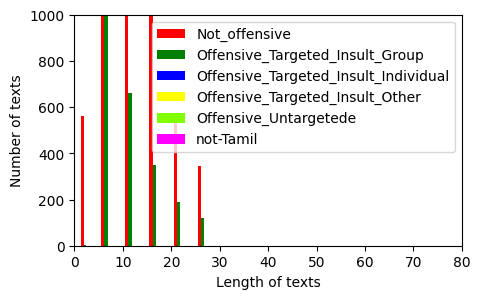

In [ ]:
comments_length_per_class(train_data,'Training')

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 46.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 67.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Prepari

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [ ]:
import ktrain
from ktrain import text

In [ ]:
train_data['label'].value_counts()

Not_offensive                           25425
Offensive_Untargetede                    2906
Offensive_Targeted_Insult_Group          2557
Offensive_Targeted_Insult_Individual     2343
not-Tamil                                1454
Offensive_Targeted_Insult_Other           454
Name: label, dtype: int64

In [ ]:
X_train = train_data['text'].tolist()
y_train = train_data['label'].tolist()

X_valid = valid_data['text'].tolist()
y_valid = valid_data['label'].tolist()

X_test = test_data['text'].tolist()
#y_test = test_data['label'].tolist()

In [ ]:
categories = ['Not_offensive','Offensive_cateTargeted_Insult_Group','Offensive_Targeted_Insult_Individual',
       'Offensive_Targeted_Insult_Other', 'Offensive_Untargetede', 'not-Tamil']

In [ ]:
model_name = 'bert-base-multilingual-cased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

In [ ]:
train = trans.preprocess_train(X_train,y_train)
valid = trans.preprocess_test(X_valid,y_valid)
#test = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: id
train sequence lengths:
	mean : 10
	95percentile : 22
	99percentile : 43


Is Multi-Label? False
preprocessing test...
language: id
test sequence lengths:
	mean : 10
	95percentile : 22
	99percentile : 44


In [ ]:
model = trans.get_classifier()

In [ ]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)


In [ ]:
#learner.lr_find(show_plot = True,max_epochs=10)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced'
                                               ,classes = np.unique(train_data['label'])
                                               ,y = train_data['label'])

weight = {i : class_weights[i] for i in range(6)}
weight

{0: 0.2303441494591937,
 1: 2.2903793508017207,
 2: 2.4995731967562955,
 3: 12.89977973568282,
 4: 2.0153131452167927,
 5: 4.027854195323246}

In [ ]:
learner.fit_onecycle(2e-5,15,class_weight=weight)     #2e-5        



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/15
   1/2929 [..............................] - ETA: 42:32:21 - loss: 1.2534 - accuracy: 0.0833

KeyboardInterrupt: ignored

In [ ]:
learner.validate(class_names=categories)

138/138 [==============================] - 17s 119ms/step
                                      precision    recall  f1-score   support

                       Not_offensive       0.88      0.86      0.87      3193
 Offensive_cateTargeted_Insult_Group       0.30      0.37      0.33       295
Offensive_Targeted_Insult_Individual       0.38      0.34      0.36       307
     Offensive_Targeted_Insult_Other       0.09      0.03      0.05        65
               Offensive_Untargetede       0.34      0.42      0.38       356
                           not-Tamil       0.81      0.86      0.84       172

                            accuracy                           0.74      4388
                           macro avg       0.47      0.48      0.47      4388
                        weighted avg       0.75      0.74      0.74      4388



array([[2735,  148,  110,    6,  164,   30],
       [ 108,  108,   16,    6,   57,    0],
       [ 104,   38,  105,    3,   55,    2],
       [  31,    9,    5,    2,   18,    0],
       [ 102,   55,   40,    6,  151,    2],
       [  16,    2,    2,    0,    4,  148]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [ ]:
predictor.save(folder_path+'Transformers_Models'+'/ta_offensive_m-bert_cw_predictor')


KeyboardInterrupt: ignored

In [ ]:
predictor = ktrain.load_predictor(folder_path+'Transformers_Models'+'/ta_offensive_m-bert_cw_predictor')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

In [ ]:
test_data['id'] = test_data.index+1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = y_pred
run

,id,text,label
0,1,14.12.2018 epo trailer pathutu irken ... Semay...,Not_offensive
1,2,Paka thana poro movie la Enna irukunu,Offensive_Untargetede
2,3,“U kena tunggu lebih lama lagi untuk tahu saya...,not-Tamil
3,4,Suriya anna vera level anna mass,Not_offensive
4,5,suma kaththaatha da sound over a pooda kudaath...,Offensive_Targeted_Insult_Individual
...,...,...,...
4387,4388,மண்ணு பொண்ணு ரெண்டுமே ஒன்னு அதுல எவன் கைய வச்ச...,Not_offensive
4388,4389,Babu mele ko ye song sunke kuch yesa feel hua ...,not-Tamil
4389,4390,asuran= aadukalam+pudupettai+ wada chennai..ye...,Offensive_Targeted_Insult_Group
4390,4391,Vijay's all movies look like same.,Not_offensive


In [ ]:
run['label'].value_counts()

Not_offensive                           3122
Offensive_Untargetede                    442
Offensive_Targeted_Insult_Group          376
Offensive_Targeted_Insult_Individual     280
not-Tamil                                152
Offensive_Targeted_Insult_Other           20
Name: label, dtype: int64

In [ ]:
run.to_csv(folder_path +'tamil_off_indic-bert_cw.csv',index = False)

Machine Learning

In [ ]:
def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split())
vectorised_posts = vectorizer.fit_transform(train_data['cleaned'])
vectorized_train_posts = vectorizer.transform(train_data['cleaned'])
vectorized_valid_posts = vectorizer.transform(valid_data['cleaned'])
vectorized_test_posts = vectorizer.transform(test_data['cleaned'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

Feature Size:  71644


In [ ]:
vectorized_valid_posts.shape

(4388, 71644)

In [ ]:
valid_data['enc_label'].value_counts()

0    3193
1     356
3     307
2     295
4     172
5      65
Name: enc_label, dtype: int64

In [ ]:
labels = ['Not_offensive', 'Offensive_Untargetede','Offensive_Targeted_Insult_Group'
                                                       ,'Offensive_Targeted_Insult_Individual','not-Tamil','Offensive_Targeted_Insult_Other']
def actual_label(row):
    return labels[row]

Logistic Regression

In [ ]:
# After Tunning
# Optimum C = 100 
lr = LogisticRegression(C=10,class_weight='balanced')
lr.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = lr.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

[[2545   86   78   71   28   20]
 [ 202  161   56   71    4   26]
 [ 196   46  124   37    2    8]
 [ 182   50   31  117    4    7]
 [  42    5    2    5  133    1]
 [  26    8    4    6    1    3]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      2828
           1       0.45      0.31      0.37       520
           2       0.42      0.30      0.35       413
           3       0.38      0.30      0.34       391
           4       0.77      0.71      0.74       188
           5       0.05      0.06      0.05        48

    accuracy                           0.70      4388
   macro avg       0.48      0.43      0.45      4388
weighted avg       0.67      0.70      0.68      4388

Accuracy :  0.7025979945305378
Precison :  0.6744401969763976
Recall :  0.7025979945305378
F1 :  0.6834702328452239


In [ ]:
test_pred = lr.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

,id,text,label
0,1,14.12.2018 epo trailer pathutu irken ... Semay...,Not_offensive
1,2,Paka thana poro movie la Enna irukunu,Not_offensive
2,3,“U kena tunggu lebih lama lagi untuk tahu saya...,not-Tamil
3,4,Suriya anna vera level anna mass,Not_offensive
4,5,suma kaththaatha da sound over a pooda kudaath...,Offensive_Targeted_Insult_Individual
...,...,...,...
4387,4388,மண்ணு பொண்ணு ரெண்டுமே ஒன்னு அதுல எவன் கைய வச்ச...,Not_offensive
4388,4389,Babu mele ko ye song sunke kuch yesa feel hua ...,not-Tamil
4389,4390,asuran= aadukalam+pudupettai+ wada chennai..ye...,Offensive_Untargetede
4390,4391,Vijay's all movies look like same.,Not_offensive


In [ ]:
run.to_csv(folder_path +'tamil_off_lr.csv',index = False)

Support Vector Machine

In [ ]:
## SVM
from sklearn.svm import SVC
svc =  SVC(kernel='linear', C = 5,random_state=1234,class_weight='balanced')
svc.fit(vectorized_train_posts,train_data['enc_label'])
y_pred = svc.predict(vectorized_valid_posts)
print_metrices(y_pred,valid_data['enc_label'])

In [ ]:
test_pred = svc.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv(folder_path +'tamil_off_svm.csv',index = False)


Ensemble Approach (Logistic Regression, Decision Tree, Random Forest)

In [ ]:
LogReg_clf = LogisticRegression(class_weight='balanced')
DTree_clf = DecisionTreeClassifier(class_weight='balanced')
rt_clf =   RandomForestClassifier(class_weight='balanced')
SVC_clf = SVC(class_weight='balanced')


voting_clf = VotingClassifier(estimators=[('SVC', SVC_clf), ('DTree', DTree_clf), ('LogReg', LogReg_clf),('RF', rt_clf)], voting='hard')
voting_clf.fit(vectorized_train_posts, train_data['enc_label'])
preds = voting_clf.predict(vectorized_valid_posts)


In [ ]:
print_metrices(valid_data['enc_label'],preds)

In [ ]:
test_pred = voting_clf.predict(vectorized_test_posts).tolist()
test_data['id'] = test_data.index + 1

In [ ]:
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv(folder_path +'tamil_off_voting.csv',index = False)

LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

In [ ]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['text'])  
word_index = tokenizer.word_index
vocab_size = len(word_index)+1

In [ ]:
print(vocab_size)

In [ ]:
max_len = 50
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(train_data['text'])
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(valid_data['text'])
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_data['text'])
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced'
                                               ,np.unique(train_data['enc_label'])
                                               ,train_data['enc_label'])

weight = {i : class_weights[i] for i in range(6)}
weight

In [ ]:
num_classes = 6

accuracy_threshold = 0.99

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = folder_path+"ta_off_BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 100, input_length = max_len),
#tf.keras.layers.Conv1D(128, 5, activation='relu'),
#tf.keras.layers.MaxPooling1D(5),
tf.keras.layers.Bidirectional(LSTM(units = 100,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(6 , activation='softmax')])

model.summary()

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size = 64,
    validation_split = 0.2,
    verbose =1,
    callbacks = callback_list,
    class_weight = weight)

In [ ]:
# Load the saved model
model = load_model(folder_path+'ta_off_BiLSTMModel.h5')
# prediction
y_pred = np.argmax(model.predict(validation_pad_sequences), axis=-1)

print("F1-Score:",f1_score(valid_data['enc_label'],y_pred,average = 'weighted')*100)
print("Accuracy:",accuracy_score(valid_data['enc_label'],y_pred)*100)

In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print_metrices(valid_data['enc_label'],y_pred)

In [ ]:
test_pred = np.argmax(model.predict(test_pad_sequences), axis=-1).tolist()
test_pred

In [ ]:
test_data['id'] = test_data.index + 1
run = pd.DataFrame(test_data['id'])
run['text'] = test_data['text']
run['label'] = test_pred
run['label'] = run['label'].apply(actual_label)
run 

In [ ]:
run.to_csv(folder_path +'tamil_bilstm.csv',index = False)